# Data Preparation of Car Buyers Information Dataset 


## Task 1 Data Preparation 

Importing all required libraries

In [1]:
import pandas as pd # import pandas package and define a nickname 'pd' for convenience
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Reading all the comma-separated values (csv) files provided into one DataFrame.


In [2]:
# Read all comma-separated values (csv) files into DataFrame.
Manufacturer = pd.read_csv('Manufacturer.csv', sep=',' , index_col=0)
Model = pd.read_csv('Model.csv', sep=',' , index_col=0)
Price = pd.read_csv('Price.csv', sep=',' , index_col=0)
Transmission = pd.read_csv('Transmission.csv', sep=',', header= 0 , index_col=0)
Power = pd.read_csv('Power.csv', sep=',', header= 0 , index_col=0)
Engine = pd.read_csv('Engine cc.csv', sep=',', header= 0 , index_col=0)
Fuel = pd.read_csv('Fuel.csv', sep=',', header= 0 , index_col=0)
Male = pd.read_csv('Male.csv', sep=',', header= 0 , index_col=0)
Female = pd.read_csv('Female.csv', sep=',', header= 0 , index_col=0)
Unknown = pd.read_csv('Unknown.csv', sep=',', header= 0 , index_col=0)
Total = pd.read_csv('Total.csv', sep=',', header= 0 , index_col=0)

Merging all dataframes to a single dataframe

In [3]:
#Use For loop to merge csv

all_df = [Model, Price, Transmission, Power, Engine, Fuel, Male, Female, Unknown, Total]
merged_df = Manufacturer
for df in all_df:
    merged_df = merged_df.merge(df, left_index=True, right_index=True, how ='inner')

In [4]:
#Get a copy of merged_df.copy

car_df = merged_df.copy()
car_df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,-94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5000.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,-89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


Rename 'Engine CC' column to Engine_CC for consistency 

In [5]:
car_df = car_df.rename(columns = {'Engine CC': 'Engine_CC'})

Check for null values and drop them

In [6]:
#Drop NaN values

car_df = car_df.dropna()

Remove commas present in some integer values  

In [7]:
#Change type from objects to integers for some columns

car_df['Male']=car_df['Male'].str.replace(',','').astype(int)
car_df['Female']=car_df['Female'].str.replace(',','').astype(int)
car_df['Unknown']=car_df['Unknown'].str.replace(',','').astype(int)
car_df['Total']=car_df['Total'].str.replace(',','').astype(int)


Print a concise summary of a DataFrame.


In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6097 entries, 0 to 6101
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6097 non-null   object 
 1   Model         6097 non-null   object 
 2   Price         6097 non-null   float64
 3   Transmission  6097 non-null   float64
 4   Power         6097 non-null   float64
 5   Engine_CC     6097 non-null   float64
 6   Fuel          6097 non-null   object 
 7   Male          6097 non-null   int64  
 8   Female        6097 non-null   int64  
 9   Unknown       6097 non-null   int64  
 10  Total         6097 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 571.6+ KB


Rounding off decimals for some columns

In [9]:
#Round of decimal

car_df['Price'] = car_df['Price'].round(decimals=2)
car_df['Transmission'] = car_df['Transmission'].round(decimals=2)
car_df['Power'] = car_df['Power'].round(decimals=2)
car_df['Engine_CC'] = car_df['Engine_CC'].round(decimals=2)

Generate descriptive statistics for car_df

In [10]:
car_df.describe()

,Price,Transmission,Power,Engine_CC,Male,Female,Unknown,Total
count,6097.000000,6097.000000,6.097000e+03,6097.000000,6.097000e+03,6097.000000,6097.000000,6.097000e+03
mean,88.759797,19.066154,1.101790e+03,1981.712609,3.295297e+04,20072.251435,2460.983106,5.548555e+04
std,3714.454041,1026.467503,6.910673e+04,817.261301,8.123568e+04,60628.807119,5795.642771,1.412439e+05
min,-22.050000,-6.000000,-9.403000e+01,0.000000,2.910000e+02,30.000000,13.000000,1.001000e+03
25%,18.510000,4.600000,7.025000e+01,1497.000000,2.784000e+03,879.000000,167.000000,3.942000e+03
50%,29.040000,5.000000,9.406000e+01,1832.890000,8.087000e+03,3372.000000,550.000000,1.273800e+04
75%,43.860000,5.970000,1.218600e+02,2247.330000,2.536600e+04,12105.000000,1945.000000,4.071800e+04
max,290050.260000,80000.000000,5.370355e+06,6208.000000,1.007113e+06,789633.000000,56487.000000,1.561512e+06


Remove whitespace and change to lowercase

In [11]:
# remove whitespaces and change to lowercase for 'Manfacturer' and 'Model' cloumns

car_df['Manufacturer']=car_df['Manufacturer'].str.lower().str.strip()
car_df['Model']=car_df['Model'].str.lower().str.strip()
car_df['Fuel']=car_df['Fuel'].str.lower().str.strip()

car_df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine_CC,Fuel,Male,Female,Unknown,Total
0,ford,focus,30.62,5.97,-94.03,1497.17,petrol,814172,422731,56487,1293390
1,ford,fiesta,18.53,5000.71,68.57,1166.14,petrol,554879,631666,54057,1240602
2,volkswagen,golf,31.24,6.16,-89.46,1537.41,petrol,483216,310604,47563,841383
3,renault,clio,22.10,5.62,75.58,1219.65,petrol,241287,312556,28004,581847
4,bmw,320i,47.85,6.44,126.11,1995.78,petrol,408016,115843,29125,552984


Clean manufacturer names that are unexpected in the dataframe


In [12]:
manufacturer_arr = ['Renault', 'BMW', 'Volkswagen', 'Peugeot', 'Ford', 'Nissan', 'Honda', 'Toyota', 'Mercedes', 'Audi', 'Citroen', 'Skoda', 'Land-Rover', 'Seat', 'Fiat', 'Mini', 'Saab', 'Hyundai', 'Kia', 'Jaguar', 'Mazda', 'Suzuki', 'Volvo', 'Rover', 'Mitsubishi', 'Smart', 'Porsche', 'Subaru', 'MG', 'Chrysler', 'Chevrolet', 'Alfa-Romeo', 'Daihatsu', 'Bentley', 'Daewoo', 'Dacia', 'Dodge', 'Lotus', 'Aston-Martin', 'Abarth', 'Ssangyong', 'Lexus', 'Maserati', 'Opel', 'Ferrari', 'TVR', 'Triumph', 'Lada', 'Daimler', 'Lancia', 'Datsun', 'Morris']
manufacturer_arr = [x.lower() for x in manufacturer_arr]

manufacturer_col = car_df['Manufacturer'].unique()
unwanted_manufacturer=list(set(manufacturer_col)-set(manufacturer_arr))
car_df = car_df[car_df.Model.isin(unwanted_manufacturer) == False]

# NO unexpected manufacturer names were found in the dataframe

Clean model names that are unexpected in the dataframe

In [13]:
#Obtain all the unwanted values present in the model column

model_arr= ['Clio', '320i', 'Polo', '206', 'Mondeo', 'Micra', 'Civic', 'Ka+', 'Megane', 'Yaris', 'CLA', 'A4', 'Passat', 'A3', '307', '207', 'Xsara', 'Fabia', '118i', 'Freelander', 'C3', 'Corolla', '535i', 'Avensis', 'E', 'Scenic', 'Ibiza', 'Range', 'Qashqai+2', 'Octavia', '500L', 'A', 'Almera', 'C4', 'C5', 'C6', 'Two', 'One', 'RAV4', 'RAV5', '9-3X', '107', 'Aygo', 'I10', 'I11', 'A6', 'Picanto', 'Note', 'Leon', 'XE', 'Fusion', 'Accord', 'MX-5', '6', 'C1', 'Swift', 'Galaxy', '308', '3', 'TT', 'Laguna', '2', 'Panda', 'Auris', '306', '106', 'V70', 'Saxo', 'Touran', 'Beetle', 'Rio', 'C-MAX', 'X5', 'Juke', 'Vitara', 'Ceed', '406', 'Getz', 'X-Trail', 'CLK', 'S40', '75', 'Berlingo', 'Alto', 'Primera', 'I20', 'SLK', 'S-MAX', 'ML', 'Sportage', '407', 'C2', 'I30', 'XF', 'A1', 'Colt', 'A5', 'S-Type', 'V50', 'Escort', 'XC90', 'V40', 'X3', 'Tiguan', 'B', 'Fortwo', 'Bora', '45', '911', 'XJ', 'Impreza', '09-May', 'Celica', 'Sharan', 'Santa', '208', 'S60', 'DS3', 'Modus', 'ZR', 'Voyager', 'Sorento', 'Z4', '2000', 'Up', 'Jimny', 'Matiz', 'Boxster', 'Wagon', '3008', '323', 'Puma', 'Stilo', 'Scirocco', 'XK', 'Altea', 'C30', 'Accent', 'Lupo', 'Sprinter', 'Ix35', 'Kangoo', '5', 'Jetta', 'Alhambra', 'Espace', 'Ignis', 'SX4', 'Carens', 'Q5', 'Partner', 'Yeti', 'Touareg', 'Seicento', 'Superb', 'Bravo', 'X1', 'Q7', '147', 'MR2', '740i', 'TF', 'S80', 'Fox', 'Twingo', 'Lancer', 'Doblo', 'Eos', 'M3', 'PT', 'Matrix', 'IQ', 'SLS', 'A2', 'Z3', 'C70', 'Roomster', 'Splash', 'Previa', 'Starlet', 'Aveo', 'XC70', 'Tucson', 'Legacy', 'Cayenne', '156', '640i', 'Spark', 'Kalos', 'Outlander', 'Pixo', 'FR-V', 'Sirion', 'Mini', 'Venga', 'Streetka', 'Felicia', 'Terrano', 'Space', 'Carisma', 'Lacetti', 'ZT', 'CLC', 'Defender', 'Arosa', 'HR-V', 'City-coupe', 'Terios', 'Carina', 'Multipla', 'A8', 'Citigo', 'Liana', 'Continental', 'Captiva', 'Pathfinder', '205', '900', 'B-MAX', '940', 'Toledo', 'Ix20', '850', 'Verso-S', 'S3', '159', 'Lanos', 'C8', '626', 'Sandero', '807', '5008', 'Cayman', '300C', '300', 'Duster', '1007', '508', 'Xantia', 'RCZ', '350Z', 'Demio', 'S2000', '190', 'Trajet', 'Tacuma', 'GT', 'Premacy', 'ZX', 'V60', 'Brava', 'S4', 'X6', 'Caliber', 'Maverick', 'Streetwise', 'CityRover', 'Cerato', 'Elise', 'Cougar', 'Roadster-coupe', 'Vantage', 'I40', 'Cruze', 'Exeo', 'Urban', 'Mii', 'A7', '405', '500C', 'Transporter', 'Spider', 'DS4', 'Picnic', 'Viano', 'Ulysse', 'Sierra', 'DB9', '80', 'Neon', 'Terracan', 'M550i', 'Magentis', 'AX', 'RS4', 'Captur', 'Grandis', 'Crossfire', 'CR-Z', 'R', 'Stream', 'Idea', 'Prelude', 'Elantra', '607', 'Rexton', 'CC', 'Roadster', '806', '9000', 'S5', 'Nemo', 'Sonata', 'Capri', 'Sedici', 'Brera', '944', 'Cordoba', 'C-Crosser', 'Cabriolet', 'Cinquecento', 'Galant', 'Qubo', 'Lantra', 'Baleno', '440', 'GS', '2008', 'S70', 'GT86', 'Caddy', '4007', 'GLK', 'Camry', 'Nitro', 'Sebring', 'Shuma', 'Veloster', 'Patrol', 'Expert', 'R8', 'Wind', 'Rapid', 'DB7', 'Corrado', 'Supra', 'Marea', 'Serena', 'Vaneo', 'Panamera', 'Copen', 'Logo', 'Paceman', '960', 'Tribute', 'M135i', 'Shuttle', 'Trafic', 'Journey', 'Phaeton', 'Justy', 'Orlando', 'Vito', 'Granada', 'Bipper', '370Z', 'RS6', 'John', 'Hilux', 'Legend', 'MX-3', 'GranCabrio', 'Scorpio', 'Rodius', 'Mustang', '121', 'Coupe', 'Integra', 'Carrera', 'Croma', 'Zafira', 'GT-R', 'DS5', 'Korando', '309', '100', 'Quattro', 'Probe', 'Focus', 'Fiesta', 'Golf', 'Discovery', 'XKR', 'Pride', '19', 'Concerto', 'Leganza', 'Bluebird', 'MPV', 'Xedos', 'Pajero', 'Orion', 'Vento', 'Nexia', 'Mentor', '460', '166', 'Maxima', 'Paseo', 'F430', '850i', 'Uno', 'Favorit', '146', 'MX-6', '145', 'Safrane', 'Move', '928', 'Musso', 'Cooper', 'Tipo', 'Espero', 'XM', 'CRX', 'Tuscan', 'Vel', '21', 'Prairie', 'SJ', 'Esprit', 'Samurai', '360', 'Tempra', '155', 'Barchetta', '90', 'TR7', 'Pony', '605', '25', '164', '11', '505', 'Marbella', 'Acclaim', 'X-90', 'Samara', '305', 'Griffith', '9', '33', 'Manta', 'Applause', '4', '3.6', 'Delta', 'Silvia', 'Sunny', '126', 'Tercel', 'Niva', 'Stellar', '99', '120', 'Kadett', '18', 'Dedra', 'Cherry', 'Marina', 'Laurel', 'Regata', '130', 'Thema', 'Stanza', 'Ital', 'Strada', 'Santana', 'Double', '105', 'Malaga', 'Ascona', 'Monza', 'Fuego', 'Derby', '104', 'Transit', 'Prisma', 'Senator', '127', '200', 'Rekord', '929', 'Cressida', 'Quintet', '14', '20', '1200', '504']
model_arr = [x.lower() for x in model_arr]
model_col = car_df['Model'].unique()
unwanted_model=list(set(model_col)-set(model_arr))
print('The following are the unexpected model names: ', unwanted_model)

# remove rows that contain the unwanted model name 
car_df = car_df[car_df.Model.isin(unwanted_model) == False]

The following are the unexpected model names:  ['rx', 'forfour', 'jazz', 'leaf', 'prius', 'zs', 'murano', 'soul', 'forester', 'insight', 'explorer', 'asx', 'kuga', 'xv', 'ct', 'outback']


Fix mistakes in Fuel column

In [14]:
## Clean Fuel column

unique_fuel=car_df['Fuel'].unique()
print('Unique values in Fuel column: ', unique_fuel)

car_df['Fuel']= car_df['Fuel'].str.replace('peatrol','petrol')
car_df['Fuel']= car_df['Fuel'].str.replace('diasel','diesel')
car_df['Fuel']= car_df['Fuel'].str.replace('autometic','automatic')

Unique values in Fuel column:  ['petrol' 'diesel' 'peatrol' 'automatic' 'diasel']


The values in the Price column can only be in the range 0.0 - 650.0 and values in the Power column can be between the range 0.0 - 500.0. Althought there are values out of this range present in the Price and Power column, they will be managed in the later steps (in task 2) to get a more visualised context. 

Clean Transmission column out of range 0.0 - 10

In [15]:
# Change negative values to positive
car_df['Transmission']=car_df['Transmission'].abs()

# Remove rows with Transmission less than 0.0 and more than 10.0 
unwanted_transmission=car_df[(car_df['Transmission'] > 10.0) | (car_df['Transmission']<0.0)].index
car_df.drop(unwanted_transmission, inplace = True)

Clean Engine_CC column out of range 0.0 - 6500.0

In [16]:
# Remove rows with Engine_CC less than 0.0 and more than 6500.0 
unwanted_engineCC = car_df[(car_df['Engine_CC'] > 6500.0) | (car_df['Engine_CC']<0.0)].index
car_df.drop(unwanted_engineCC, inplace = True)
car_df =car_df.reset_index(drop = True)

Drop any duplicate columns that may exist

In [17]:
#Drop any duplicates
car_df = car_df.drop_duplicates()

Dealing with semi-duplicate rows

In [18]:
#sum population of duplicate columns
car_df=car_df.drop_duplicates().groupby(['Manufacturer','Model','Price', 'Transmission', 'Power', 'Engine_CC', 'Fuel'], sort=False, as_index=False).sum()
car_df[['Male', 'Female', 'Unknown', 'Total']] = car_df[['Male', 'Female', 'Unknown', 'Total']].astype(int)


View the mostly cleaned data frame

In [19]:
car_df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine_CC,Fuel,Male,Female,Unknown,Total
0,ford,focus,30.62,5.97,-94.03,1497.17,petrol,814172,422731,56487,1293390
1,volkswagen,golf,31.24,6.16,-89.46,1537.41,petrol,483216,310604,47563,841383
2,renault,clio,22.10,5.62,75.58,1219.65,petrol,3929068,5633947,445121,10008136
3,bmw,320i,47.85,6.44,126.11,1995.78,petrol,6213366,2090926,429229,8733521
4,volkswagen,polo,18.19,5.07,60.96,1408.06,petrol,3656888,4881887,499911,9038686


The dataframe will be read to a CSV file after task 2

## Task 2 Data Exploration 

### Task 2.1

 Exploring the cars’ total number vehicle owners by gender for the top ten vehicles with the most owners.

In [20]:
sorted_df= car_df.sort_values(by='Total', ascending = False)
sorted_df = sorted_df.head(10)
sorted_df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine_CC,Fuel,Male,Female,Unknown,Total
382,ford,fiesta,18.53,5.71,68.57,1166.14,petrol,11596040,12760305,876752,25233097
101,ford,escort,16.21,4.46,63.56,1650.21,petrol,10937297,5357916,486565,16781778
383,volkswagen,golf,31.24,6.16,89.46,1537.41,petrol,6856310,4420689,655247,11932246
6,ford,mondeo,39.97,1.75,130.25,1998.50,petrol,8254266,1818587,340635,10413488
381,ford,focus,30.62,5.97,94.03,1497.17,petrol,6407597,3355129,408615,10171341


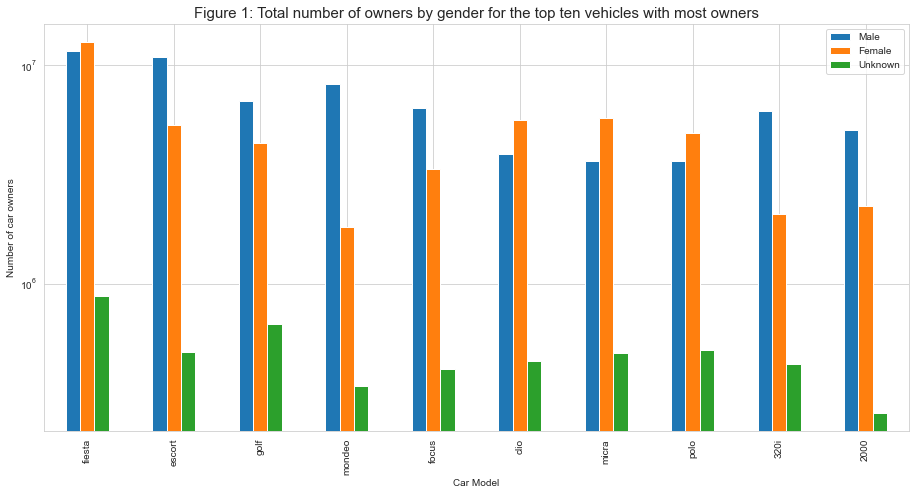

In [21]:
sorted_df.plot(x='Model', y=['Male', 'Female', 'Unknown'], kind='bar') 
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.yscale('log')
plt.ylabel('Number of car owners')
plt.xlabel('Car Model')
plt.title('Figure 1: Total number of owners by gender for the top ten vehicles with most owners', fontsize=15)
plt.show()

### Task 2.2

Exploring the error in 'Price' and 'Power' columns by visualization

FIgure 2a and 2b represents the distribution of data before dealing with the errors

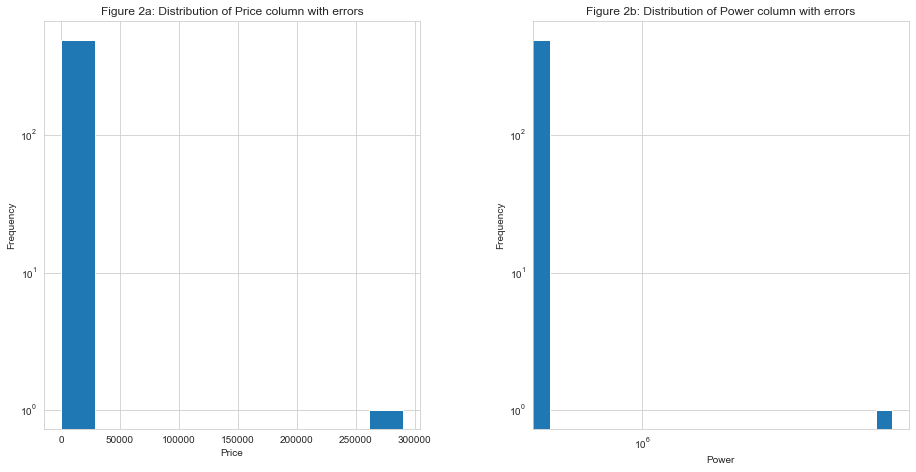

In [22]:
fig, axes = plt.subplots(1, 2)

car_df[['Price']].hist(bins=10, ax=axes[0])
car_df[['Power']].hist(bins=10, ax=axes[1])
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.yscale('log')
axes[0].set_title('Figure 2a: Distribution of Price column with errors')
axes[1].set_title('Figure 2b: Distribution of Power column with errors')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Power')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
plt.show()

Errors in 'Price' column

In [23]:
#Errors in 'Price' column
unwanted_price=car_df[(car_df['Price'] > 650.0) | (car_df['Price']<0.0)]
price_outliers = pd.DataFrame(data=unwanted_price)
price_outliers.head()

,Manufacturer,Model,Price,Transmission,Power,Engine_CC,Fuel,Male,Female,Unknown,Total
36,citroen,c5,290050.26,5.95,0.12,1462.36,petrol,79604,42130,5547,127281
386,rover,cityrover,-11.74,5.00,63.00,1405.00,petrol,2725,3148,443,6316
387,toyota,verso-s,-22.05,3.60,73.00,1329.00,petrol,3117,1976,357,5450


Visualise errors in 'Price' Column

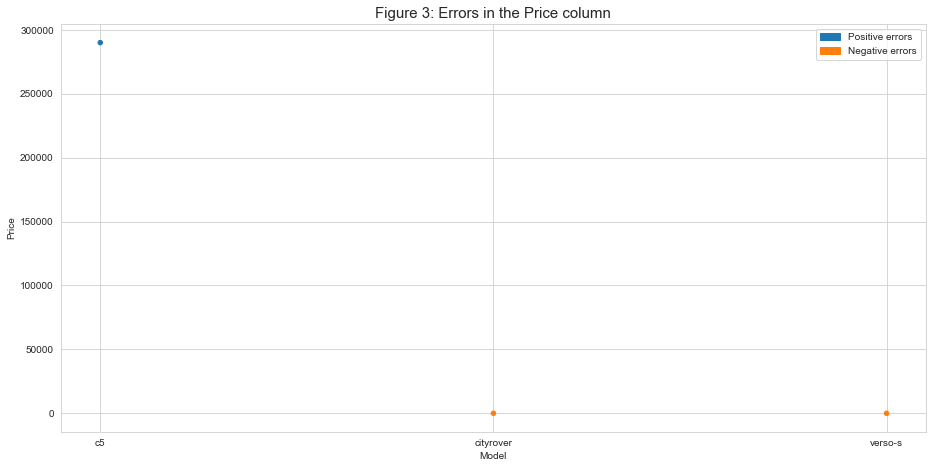

In [24]:
import numpy as np
import matplotlib.patches as mpatches

colors = np.where(price_outliers['Price']<0, 'C1', 'C0')

price_outliers.plot(kind='scatter', x= 'Model', y='Price',  c=colors.ravel())
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
pos_a = mpatches.Patch(color='C0', label='Positive errors')
pos_b = mpatches.Patch(color='C1', label='Negative errors')
plt.legend(handles=[pos_a,pos_b])
plt.ylabel('Price')
plt.xlabel('Model')
plt.title('Figure 3: Errors in the Price column', fontsize=15)
plt.show()


Errors in 'Power' column

In [25]:
#Errors in 'Power' column
unwanted_power=car_df[(car_df['Power'] > 500.0) | (car_df['Power']<0.0)]
power_outliers = pd.DataFrame(data=unwanted_power)
power_outliers.head()

,Manufacturer,Model,Price,Transmission,Power,Engine_CC,Fuel,Male,Female,Unknown,Total
0,ford,focus,30.62,5.97,-94.03,1497.17,petrol,814172,422731,56487,1293390
1,volkswagen,golf,31.24,6.16,-89.46,1537.41,petrol,483216,310604,47563,841383
37,citroen,c6,2.26,7.95,70600.12,1462.36,petrol,79604,42130,5547,127281
38,mini,two,3.56,5.95,80120.12,1462.36,petrol,79604,42130,5547,127281
41,toyota,rav5,4.35,1.35,5370354.77,2261.19,petrol,59395,54005,8166,121566


Visualise errors in 'Power' Column

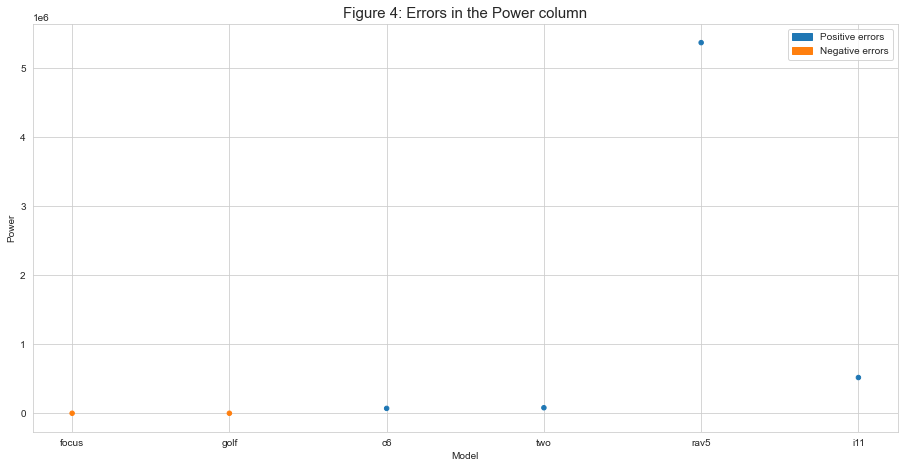

In [26]:
colors = np.where(power_outliers['Power']<0, 'C1', 'C0')

power_outliers.plot(kind='scatter', x= 'Model', y='Power',  c=colors.ravel())
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
pos_a = mpatches.Patch(color='C0', label='Positive errors')
pos_b = mpatches.Patch(color='C1', label='Negative errors')
plt.legend(handles=[pos_a,pos_b])
plt.ylabel('Power')
plt.xlabel('Model')
plt.title('Figure 4: Errors in the Power column', fontsize=15)
plt.show()

Cleaning Price column

In [27]:
# Change negative values to positive
car_df['Price']=car_df['Price'].abs()

# Remove rows with price greater than 650.0 
unwanted_price=car_df[(car_df['Price'] > 650.0) | (car_df['Price']<0.0)].index
price_outliers = pd.DataFrame(data=unwanted_price)
car_df.drop(unwanted_price, inplace = True)

Cleaning Power column

In [28]:
# Change negative values to positive
car_df['Power']=car_df['Power'].abs()

# Remove rows with Power less than 0.0 and more than 500.0 
unwanted_power = car_df[(car_df['Power'] > 500.0) | (car_df['Power']<0.0)].index
car_df.drop(unwanted_power, inplace = True)

Dealing with any duplicate values again after cleaning the errors

In [29]:
#sum population of duplicate columns again after dealing with the erros
car_df=car_df.drop_duplicates().groupby(['Manufacturer','Model','Price', 'Transmission', 'Power', 'Engine_CC', 'Fuel'], sort=False, as_index=False).sum()
car_df[['Male', 'Female', 'Unknown', 'Total']] = car_df[['Male', 'Female', 'Unknown', 'Total']].astype(int)


Visualisation of Price and Power column after dealing with errors

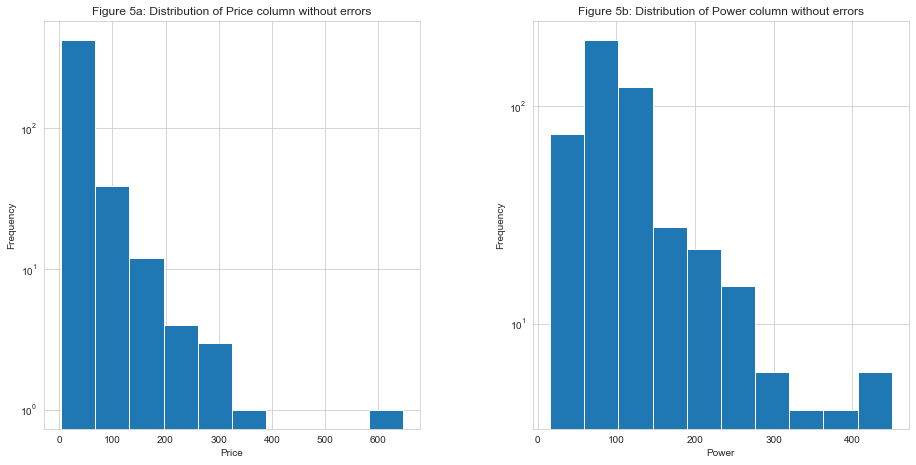

In [30]:
fig, axes = plt.subplots(1, 2)

car_df[['Price']].hist(bins=10, ax=axes[0])
car_df[['Power']].hist(bins=10, ax=axes[1])
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.yscale('log')
axes[0].set_title('Figure 5a: Distribution of Price column without errors')
axes[1].set_title('Figure 5b: Distribution of Power column without errors')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Power')
axes[0].set_xlabel('Price')
axes[1].set_ylabel('Frequency')
axes[0].set_yscale('log')
axes[1].set_yscale('log')
plt.show()

### Task 2.3

Relationship between Male car owners and other car attributes

In [31]:
rel_samp=car_df.drop_duplicates().groupby(['Price','Transmission', 'Engine_CC'], sort=False, as_index=False).sum()
rel_samp = rel_samp[[ 'Price', 'Transmission', 'Engine_CC','Male']]

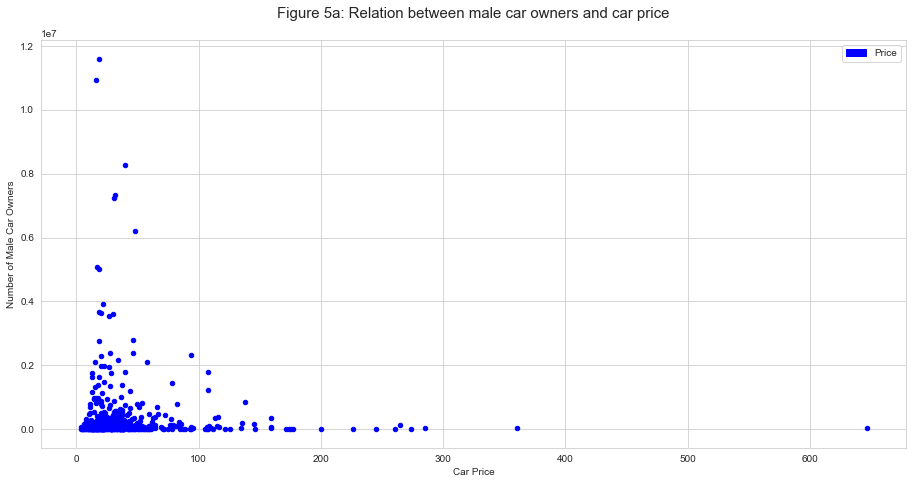

In [32]:

rel_samp.plot(kind='scatter', x='Price', y='Male', color='b')    

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
pos_a = mpatches.Patch(color='b', label='Price')

plt.legend(handles=[pos_a])

plt.ylabel('Number of Male Car Owners')
plt.xlabel('Car Price')

plt.title('Figure 5a: Relation between male car owners and car price\n', fontsize=15)
plt.show()


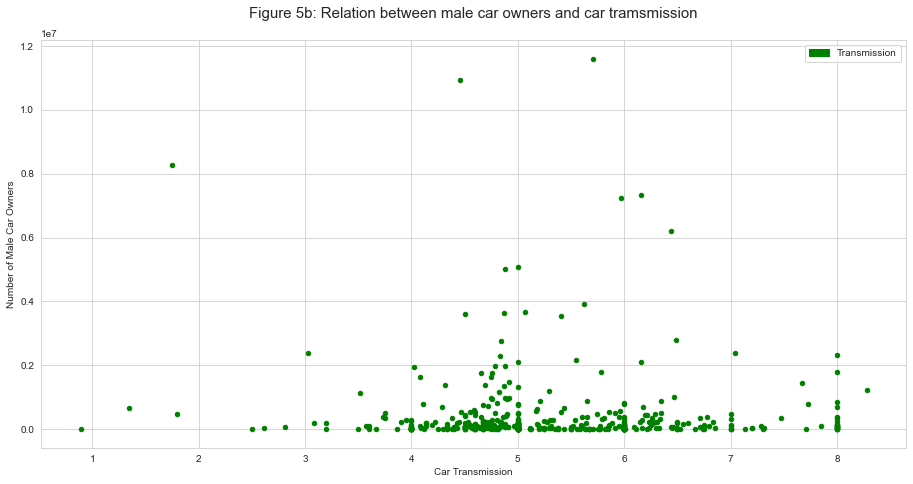

In [33]:
rel_samp.plot(kind='scatter', x='Transmission', y='Male', color='g')    

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
pos_a = mpatches.Patch(color='g', label='Transmission')

plt.legend(handles=[pos_a])

plt.ylabel('Number of Male Car Owners')
plt.xlabel('Car Transmission')

plt.title('Figure 5b: Relation between male car owners and car tramsmission\n', fontsize=15)
plt.show()


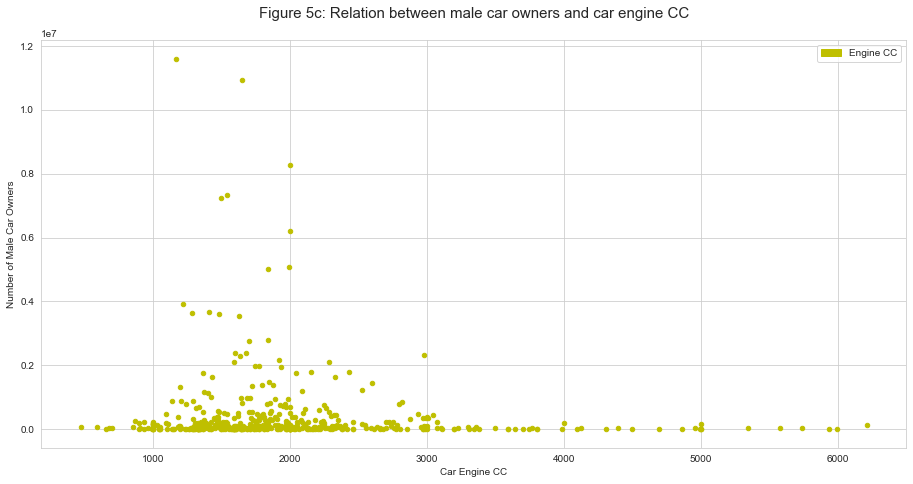

In [34]:
rel_samp.plot(kind='scatter', x='Engine_CC', y='Male', color='y')    

fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
pos_a = mpatches.Patch(color='y', label='Engine CC')

plt.legend(handles=[pos_a])

plt.ylabel('Number of Male Car Owners')
plt.xlabel('Car Engine CC')

plt.title('Figure 5c: Relation between male car owners and car engine CC\n', fontsize=15)
plt.show()


Exploring relationship between the number of Male owners and the type of fuel used compared to other genders

In [35]:
car_sample=car_df.drop_duplicates().groupby(['Fuel'], sort=False, as_index=False).sum()
car_sample = car_sample[['Fuel', 'Male', 'Female', 'Unknown']]

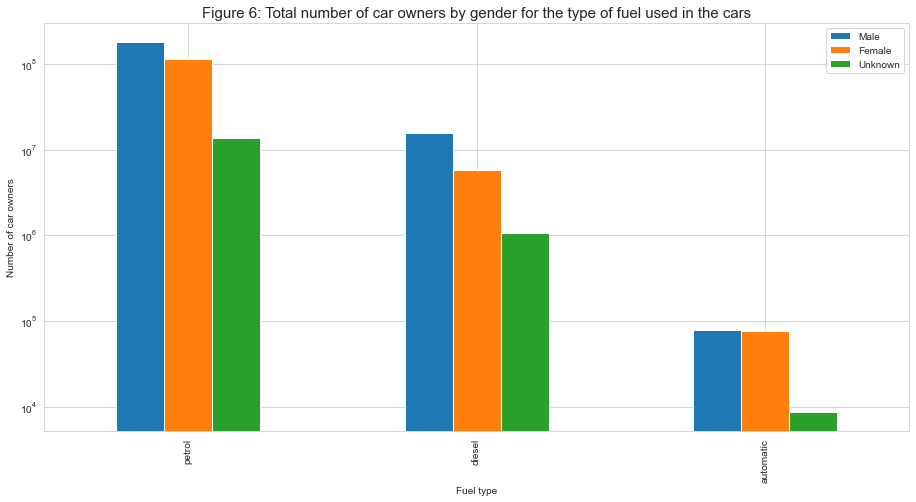

In [36]:
car_sample.plot(x='Fuel', y=['Male', 'Female', 'Unknown'], kind='bar') 
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.yscale('log')
plt.ylabel('Number of car owners')
plt.xlabel('Fuel type')
plt.title('Figure 6: Total number of car owners by gender for the type of fuel used in the cars', fontsize=15)
plt.show()

Generating the prepared 'cleaned_car_buyers.csv' file


In [37]:
car_df.head()

,Manufacturer,Model,Price,Transmission,Power,Engine_CC,Fuel,Male,Female,Unknown,Total
0,ford,focus,30.62,5.97,94.03,1497.17,petrol,7221769,3777860,465102,11464731
1,volkswagen,golf,31.24,6.16,89.46,1537.41,petrol,7339526,4731293,702810,12773629
2,renault,clio,22.10,5.62,75.58,1219.65,petrol,3929068,5633947,445121,10008136
3,bmw,320i,47.85,6.44,126.11,1995.78,petrol,6213366,2090926,429229,8733521
4,volkswagen,polo,18.19,5.07,60.96,1408.06,petrol,3656888,4881887,499911,9038686


In [38]:
#Generate csv from the dataframe
car_df.to_csv('cleaned_car_buyers.csv')